# Homework_2

# Part 1: Digit recognition using CNNs


# 1. Importing Libraries and the Dataset

In [78]:
import pandas as pd
import seaborn as sns
import tensorflow                       
import numpy as np                           
import matplotlib.pyplot as plt  

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,  Input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import backend as K
%matplotlib inline


ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [79]:
import tensorflow 

print("TensorFlow version:", tensorflow.__version__)


TensorFlow version: 2.14.0


In [80]:
 # Loading data
(X_train, y_train) , (X_test, y_test) =mnist.load_data()     

In [81]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [82]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [83]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [84]:
# Checking the shape of one image
X_train[68].shape

(28, 28)

In [85]:
X_train[169]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  42, 235, 255,  84,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        132, 208, 253, 253, 171, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [86]:
import matplotlib.pyplot as plt

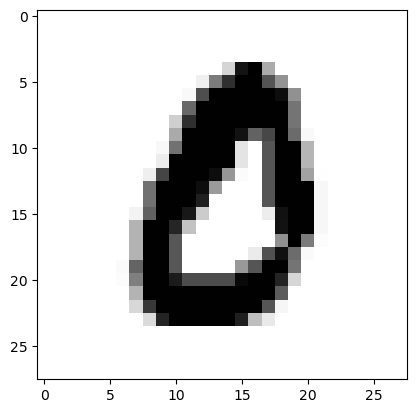

In [87]:
plt.imshow(X_train[169], cmap= plt.cm.binary)

In [88]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

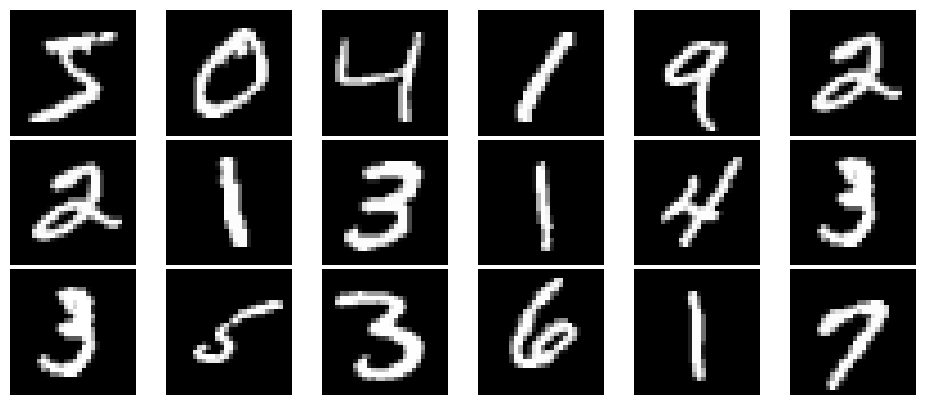

In [89]:
num_rows, num_cols = 3, 6       # Datadan 3 tane row, 6 tane column sectik.
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
plt.show()
plt.close()

C:\Users\bulen\AppData\Local\Temp\ipykernel_16436\3924017328.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


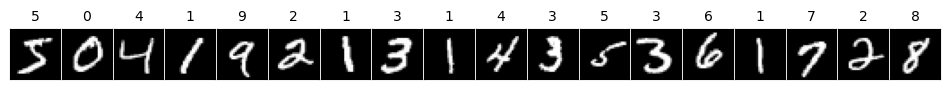

In [90]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=18, figsize=(12,5),
                         gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                         squeeze=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(str(y_train[i]), fontsize=10)
    
plt.tight_layout()
plt.show()

# Data Preprocessing

In [91]:
X_train[9].min()

0

In [92]:
X_train[9].max()

255

In [93]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [94]:
X_train[17]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [95]:
X_train[17].min()

0.0

In [96]:
X_train[17].max()

1.0

In [97]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [98]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Eğer X_train, 28x28 boyutunda tek bir matris (shape=(60000, 28, 28)) olsaydı, onu bir CNN modeline sokmak mümkün olmazdı çünkü CNN modelleri 4 boyutlu bir veri yapısı beklerler. Bu nedenle, reshape işlemi yapılarak X_train, 4 boyutlu bir veri yapısı olan (60000, 28, 28, 1) şekline dönüştürülmüştür.

In [99]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [100]:
X_train[777].shape

(28, 28, 1)

In [101]:
from tensorflow.keras.utils import to_categorical

In [102]:
y_train[115]

4

In [103]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [104]:
Y_train[115]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [105]:
Y_train[715]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Bu, sinir ağında kullanılacak verinin 2 boyutlu olduğunu gösterir. Bu durumda, veri 28x28 piksel boyutlarında olduğu için 2D olarak ifade edilir. 3D ifade, örneğin video gibi 3 boyutlu veri türleri için kullanılır.

# Build Model

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization


In [122]:

model = Sequential() 

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())  
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))




model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

#  model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

In [123]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_146 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 conv2d_147 (Conv2D)         (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_72 (Ba  (None, 12, 12, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_148 (Conv2D)         (None, 10, 10, 128)     

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

60.000/32

# Train the Model

In [126]:
model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/50
469/469 [==============================] - 169s 355ms/step - loss: 0.7449 - accuracy: 0.7770 - val_loss: 2.1341 - val_accuracy: 0.2558
Epoch 2/50
469/469 [==============================] - 176s 374ms/step - loss: 0.2554 - accuracy: 0.9309 - val_loss: 0.0605 - val_accuracy: 0.9814
Epoch 3/50
469/469 [==============================] - 173s 369ms/step - loss: 0.1819 - accuracy: 0.9509 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 4/50
469/469 [==============================] - 173s 369ms/step - loss: 0.1429 - accuracy: 0.9607 - val_loss: 0.0394 - val_accuracy: 0.9876
Epoch 5/50
469/469 [==============================] - 174s 371ms/step - loss: 0.1264 - accuracy: 0.9650 - val_loss: 0.0364 - val_accuracy: 0.9889
Epoch 6/50
469/469 [==============================] - 190s 405ms/step - loss: 0.1150 - accuracy: 0.9689 - val_loss: 0.0355 - val_accuracy: 0.9896
Epoch 7/50
469/469 [==============================] - 185s 394ms/step - loss: 0.1041 - accuracy: 0.9718 - val_loss: 0.0320 -

#  Model Evaluation

In [127]:
model.metrics_names  

['loss', 'accuracy']

In [129]:
model.history.history   

{'loss': [0.7449414730072021,
  0.25541168451309204,
  0.1819046288728714,
  0.1428898721933365,
  0.12635010480880737,
  0.1149708554148674,
  0.1040910854935646,
  0.098463274538517,
  0.09584108740091324,
  0.0891987681388855,
  0.0826866626739502,
  0.08056388795375824,
  0.07823821902275085],
 'accuracy': [0.7770166397094727,
  0.930899977684021,
  0.9508500099182129,
  0.9607333540916443,
  0.9650166630744934,
  0.9688500165939331,
  0.971833348274231,
  0.9728000164031982,
  0.9738166928291321,
  0.9751833081245422,
  0.9776999950408936,
  0.9787833094596863,
  0.9785666465759277],
 'val_loss': [2.1340973377227783,
  0.06051650270819664,
  0.04640161618590355,
  0.0394316129386425,
  0.03637009486556053,
  0.03551527485251427,
  0.031983230262994766,
  0.03236354514956474,
  0.027570242062211037,
  0.02593306638300419,
  0.027654550969600677,
  0.028059521690011024,
  0.02702391892671585],
 'val_accuracy': [0.2558000087738037,
  0.9814000129699707,
  0.9860000014305115,
  0.9876

In [130]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.744941,0.777017,2.134097,0.2558
1,0.255412,0.930900,0.060517,0.9814
2,0.181905,0.950850,0.046402,0.9860
3,0.142890,0.960733,0.039432,0.9876
4,0.126350,0.965017,0.036370,0.9889


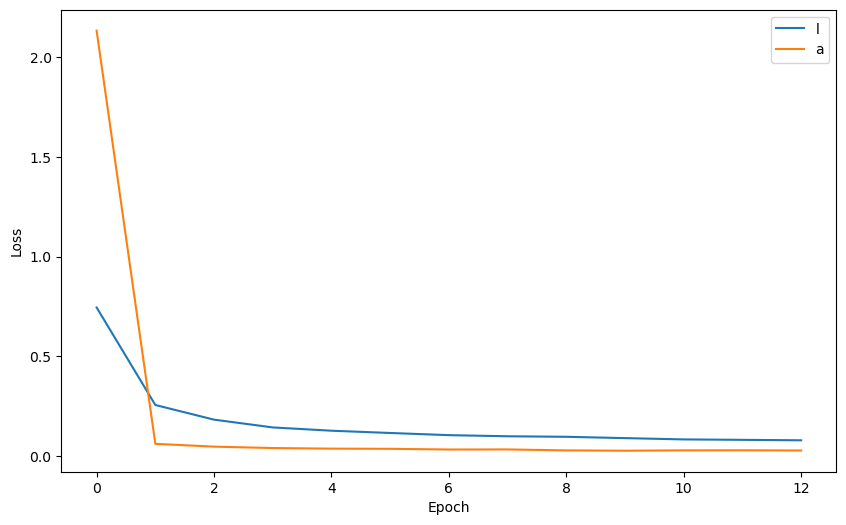

In [131]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)              
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

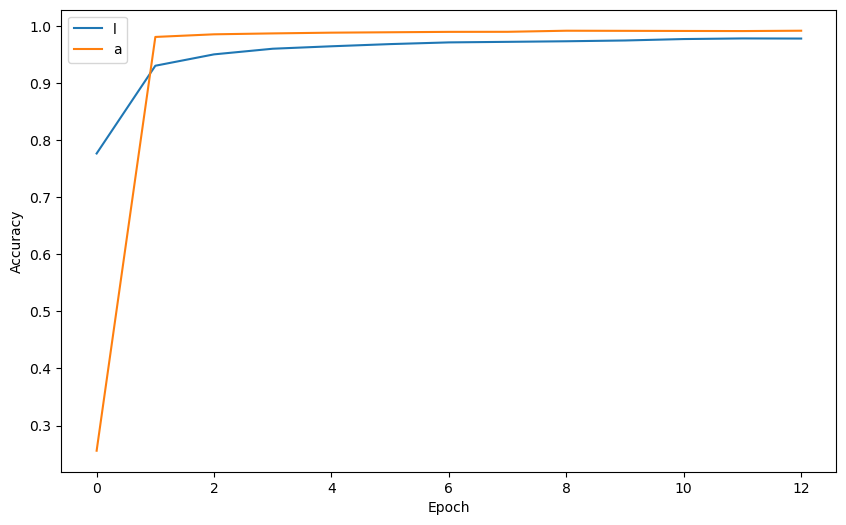

In [132]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        # DataFrame' den cekilen accuracy degerleri
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [133]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 6s 19ms/step - loss: 0.0270 - accuracy: 0.9923
[0.027023926377296448, 0.9922999739646912]


model.evaluate() fonksiyonu, modelin test setindeki performansını hesaplar. Bu fonksiyona test seti verileri (X_test) ve gerçek etiketleri (Y_test) parametre olarak verilir. Fonksiyon, iki değer döndürür: test seti üzerindeki kayıp (loss) ve doğruluk (accuracy) oranı.

In [134]:
from sklearn.metrics import classification_report,confusion_matrix

In [135]:
preds = model.predict(X_test)
preds

313/313 [==============================] - 6s 18ms/step


array([[1.1568714e-08, 2.0445493e-06, 1.0866900e-06, ..., 9.9999237e-01,
        9.0181489e-09, 2.9102362e-06],
       [2.3530411e-04, 1.7402603e-04, 9.9907875e-01, ..., 3.9856957e-04,
        8.9221585e-06, 9.4379550e-07],
       [1.7022966e-08, 9.9999607e-01, 8.4638714e-08, ..., 2.0573348e-06,
        1.8597447e-08, 4.2697952e-09],
       ...,
       [2.6512648e-10, 3.2277477e-08, 2.8749469e-10, ..., 5.3072400e-09,
        1.0295665e-08, 2.3230912e-06],
       [5.7021740e-08, 2.6092517e-08, 1.4452644e-09, ..., 1.2623191e-09,
        1.3689657e-06, 1.8946079e-07],
       [6.3857528e-06, 5.8954708e-07, 4.2866070e-08, ..., 5.4895044e-09,
        2.8706512e-07, 8.5340917e-09]], dtype=float32)

preds değişkeni, modelimiz tarafından tahmin edilen test veri setindeki her bir görüntünün sınıf tahminlerini içeren bir numpy dizisidir. Yani, her bir test görüntüsü için, modelimiz tarafından öngörülen sınıfın olasılıklarını gösterir.

In [137]:
preds[2]

array([1.7022966e-08, 9.9999607e-01, 8.4638714e-08, 4.3280622e-08,
       7.9135310e-07, 1.7980908e-07, 6.0278575e-07, 2.0573348e-06,
       1.8597447e-08, 4.2697952e-09], dtype=float32)

9.9999964e-01: Sekizinci sınıfın tahmini olasılık değeri. Bu değer çok yüksektir, bu nedenle model bu sınıfı büyük bir olasılıkla tahmin ediyor.

"9.9999964e-01" ifadesindeki "e" veya "E" harfi, bilimsel gösterimde üs (exponent) işaretini temsil eder. Bu gösterimde bir sayının büyüklüğünü daha kompakt bir şekilde ifade etmek için kullanılır.

Yani, "9.9999964e-01" ifadesi aslında "0.99999964" değerini ifade eder. Bu, yaklaşık olarak 1'e çok yakın bir değerdir. Bu nedenle, bu değer neredeyse tam olarak 1'dir.

In [138]:
preds[1]

array([2.3530411e-04, 1.7402603e-04, 9.9907875e-01, 7.2064497e-05,
       1.6062826e-05, 7.0507730e-07, 1.4582739e-05, 3.9856957e-04,
       8.9221585e-06, 9.4379550e-07], dtype=float32)

In [139]:
predictions= np.argmax(preds, axis=1)


predictions adlı değişkene, preds adlı numpy dizisindeki en yüksek olasılığa sahip sınıfın indeksleri atanıyor. axis=1 parametresi, argmax işleminin sütunlara göre (yani her örnekteki sınıf olasılıklarının karşılaştırılması) yapılacağını belirtir. Sonuç olarak, predictions dizisi, preds dizisindeki her örnek için en yüksek olasılığa sahip sınıfın indekslerini içerir.

In [140]:
len(predictions)

10000

In [141]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [142]:
print(predictions[:300])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8]


In [143]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      1.00      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [144]:
print(confusion_matrix(y_test, predictions))

[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   2    1 1021    0    0    0    3    5    0    0]
 [   0    0    2 1003    0    3    0    1    1    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   3    3    0    3    0  877    5    1    0    0]
 [   6    3    0    0    1    1  947    0    0    0]
 [   0    5    3    0    0    1    0 1019    0    0]
 [   0    1    1    0    1    0    1    0  967    3]
 [   4    0    0    0    2    0    0    3    1  999]]


In [145]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027023926377296448
Test accuracy: 0.9922999739646912


In [149]:
my_number = X_test[12]

In [150]:
my_number.shape

(28, 28, 1)

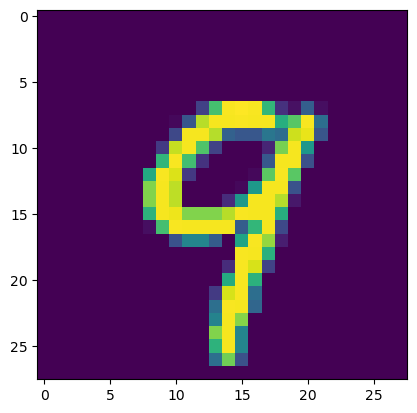

In [151]:
plt.imshow(my_number); 

In [152]:
model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 43ms/step


array([[3.1494686e-08, 2.1716114e-10, 2.3205611e-10, 7.6041156e-09,
        9.2356668e-06, 6.4988903e-08, 3.3388381e-09, 1.1944617e-07,
        7.1081800e-08, 9.9999046e-01]], dtype=float32)

In [153]:
model.save("MNIST_Model.h5")

C:\Users\bulen\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Part 2: Input optimization for a CNN

# 1.Read your data.

In [155]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

In [156]:
 # Loading data
(_, _), (X_test, y_test) = mnist.load_data()    

# 2.Load your model from the first part.

In [157]:
model = load_model("MNIST_Model.h5")

In [161]:
# Örnek veri seç ve modelimizden tahmin al
idx = np.random.randint(0, X_test.shape[0])
sample = X_test[idx]
prediction = model.predict(sample.reshape(1, 28, 28, 1))

# Tahmin sonucunu ekrana yazdır
print(f"Gerçek Etiket: {y_test[idx]}")
print(f"Tahmin Edilen Etiket: {np.argmax(prediction)}")

1/1 [==============================] - 0s 39ms/step
Gerçek Etiket: 1
Tahmin Edilen Etiket: 8


In [ ]:
model = load_model("cnn-1.h5_Batch_150"): Önceden eğitilmiş bir CNN modelini yükler. Model dosyası "cnn-1.h5_Batch_150" adıyla kaydedilmiştir ve bu kod modeli yükler.

idx = np.random.randint(0, X_test.shape[0]): Rastgele bir indeks seçer. Bu, test verileri içinde rastgele bir görüntü seçmek için kullanılacaktır.

sample = X_test[idx]: Seçilen rastgele görüntüyü sample adlı bir değişkene atar.

prediction = model.predict(sample.reshape(1, 28, 28, 1)): Modeli kullanarak seçilen görüntü üzerinde bir tahmin yapar. Görüntü, modelin beklentilerine uygun bir şekilde yeniden boyutlandırılır ve ardından model.predict ile tahmin edilir.

print(f"Gerçek Etiket: {y_test[idx]}"): Seçilen görüntünün gerçek etiketini ekrana yazdırır. MNIST veri kümesi, her görüntüye karşılık gelen bir etiket içerir.

print(f"Tahmin Edilen Etiket: {np.argmax(prediction)}"): Modelin tahmin ettiği etiketi ekrana yazdırır. np.argmax işlevi, tahmin sonucu dizisinde en yüksek olasılığa sahip olan indeksi alır ve tahmin edilen etiketi verir.

Sonuç olarak, bu kod, önceden eğitilmiş bir CNN modelini kullanarak MNIST veri kümesinden rastgele bir rakam görüntüsünün sınıflandırılmasını gösterir ve gerçek ve tahmin edilen etiketleri ekrana yazdırır.

Bu kod bloğunu çalıştırdığımızda, rastgele bir resim seçilir, bu resim modelimize verilir ve modelimizden tahmin alınır. Sonuç olarak gerçek etiket ve tahmin edilen etiket ekrana yazdırılır.

Bu kod önce X_test'den rastgele bir örnek (sample) seçer, ardından bu örneği modelin girdi şekline (input shape) uygun olarak yeniden boyutlandırır. Daha sonra predict() fonksiyonunu kullanarak bu örneğin sınıf tahminini alır.

# 3.For the output [0,0,1,0,0,0,0,0,0,0] (i.e., digit 1):
a.Create a random image (your image should be gray scale with values from 0 to 1, i.e., normalized).